In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer/sample_submission.csv
/kaggle/input/customer/Train.csv
/kaggle/input/customer/Test.csv


In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285413 sha256=d5c47a64c685f629f2f475976f91e1e10e27dec5d22de5e6b0d6a20079e32f0f
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_df =  pd.read_csv('/kaggle/input/customer/Train.csv')
test_df =  pd.read_csv('/kaggle/input/customer/Test.csv')

In [5]:
train_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [6]:
test_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [7]:
len(train_df.columns)

11

# Understand data


In [8]:
import pyspark
from pyspark.sql import SparkSession

In [9]:
spark = SparkSession.builder.appName('Pratise').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/08/31 09:32:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [10]:
spark

In [11]:
df_spark = spark.read.option("header","true").csv('/kaggle/input/customer/Train.csv')


In [12]:
df_spark.show()

+------+------+------------+---+---------+-------------+---------------+--------------+-----------+-----+------------+
|    ID|Gender|Ever_Married|Age|Graduated|   Profession|Work_Experience|Spending_Score|Family_Size|Var_1|Segmentation|
+------+------+------------+---+---------+-------------+---------------+--------------+-----------+-----+------------+
|462809|  Male|          No| 22|       No|   Healthcare|            1.0|           Low|        4.0|Cat_4|           D|
|462643|Female|         Yes| 38|      Yes|     Engineer|           null|       Average|        3.0|Cat_4|           A|
|466315|Female|         Yes| 67|      Yes|     Engineer|            1.0|           Low|        1.0|Cat_6|           B|
|461735|  Male|         Yes| 67|      Yes|       Lawyer|            0.0|          High|        2.0|Cat_6|           B|
|462669|Female|         Yes| 40|      Yes|Entertainment|           null|          High|        6.0|Cat_6|           A|
|461319|  Male|         Yes| 56|       No|      

In [13]:
df_spark.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Ever_Married: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Graduated: string (nullable = true)
 |-- Profession: string (nullable = true)
 |-- Work_Experience: string (nullable = true)
 |-- Spending_Score: string (nullable = true)
 |-- Family_Size: string (nullable = true)
 |-- Var_1: string (nullable = true)
 |-- Segmentation: string (nullable = true)



In [14]:
df_spark.createOrReplaceTempView("customer")

In [15]:
column_names = df_spark.columns
column_names

['ID',
 'Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'Segmentation']

In [16]:
# for i in ['A','B','C','D']:
spark.sql(f"select * from customer where Segmentation = 'A' limit 1").show()
print("===================================================================")
spark.sql(f"select * from customer where Segmentation = 'B' limit 1").show()
print("===================================================================")
spark.sql(f"select * from customer where Segmentation = 'C' limit 1").show()
print("===================================================================")
spark.sql(f"select * from customer where Segmentation = 'D' limit 1").show()
print("===================================================================")

+------+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
|    ID|Gender|Ever_Married|Age|Graduated|Profession|Work_Experience|Spending_Score|Family_Size|Var_1|Segmentation|
+------+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
|462643|Female|         Yes| 38|      Yes|  Engineer|           null|       Average|        3.0|Cat_4|           A|
+------+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+

+------+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
|    ID|Gender|Ever_Married|Age|Graduated|Profession|Work_Experience|Spending_Score|Family_Size|Var_1|Segmentation|
+------+------+------------+---+---------+----------+---------------+--------------+-----------+-----+------------+
|466315|Female|         Yes| 67|      Yes|  Engineer|            1.0|  

In [17]:
for i in column_names:
    spark.sql(f"select DISTINCT({i}) as DISTINCT_VALUE_of_LABELS_{i} from customer").show()
    print("===============================================================================")

+---------------------------+
|DISTINCT_VALUE_of_LABELS_ID|
+---------------------------+
|                     467271|
|                     467162|
|                     464090|
|                     459636|
|                     467636|
|                     463713|
|                     462117|
|                     461561|
|                     467698|
|                     462160|
|                     461855|
|                     463554|
|                     461378|
|                     463343|
|                     466453|
|                     467598|
|                     461473|
|                     464050|
|                     462956|
|                     467895|
+---------------------------+
only showing top 20 rows

+-------------------------------+
|DISTINCT_VALUE_of_LABELS_Gender|
+-------------------------------+
|                         Female|
|                           Male|
+-------------------------------+

+-------------------------------------+
|DISTINCT

In [18]:
df_spark.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Ever_Married: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Graduated: string (nullable = true)
 |-- Profession: string (nullable = true)
 |-- Work_Experience: string (nullable = true)
 |-- Spending_Score: string (nullable = true)
 |-- Family_Size: string (nullable = true)
 |-- Var_1: string (nullable = true)
 |-- Segmentation: string (nullable = true)



# Preprocess Data

## Replace "null" value

As the missing value appear in many columns in both "Train" and "Test" -> find suitable values for these missing places:

In pandas there are many solutions:

    + fillna, ffill, bfill
    
    + Drop NaN
    
    + interpolate 
    
But these missing values don't follow any rules -> choose the nearest with numberic values

With string values use "fillna"


In [19]:
train_df = train_df.interpolate(method='nearest')
train_df['Ever_Married'] = train_df['Ever_Married'].fillna('No')
train_df['Graduated'] = train_df['Graduated'].fillna('No')
train_df['Profession'] = train_df['Profession'].fillna('None')

In [20]:
test_df = test_df.interpolate(method='nearest')
test_df['Ever_Married'] = test_df['Ever_Married'].fillna('No')
test_df['Graduated'] = test_df['Graduated'].fillna('No')
test_df['Profession'] = test_df['Profession'].fillna('None')

In [21]:
train_df.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [22]:
for col in train_df:
    print(f"Column name: {col}")
    print(train_df[col].unique())
    print("=============================================================")

Column name: ID
[462809 462643 466315 ... 465406 467299 461879]
Column name: Gender
['Male' 'Female']
Column name: Ever_Married
['No' 'Yes']
Column name: Age
[22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Column name: Graduated
['No' 'Yes']
Column name: Profession
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' 'None']
Column name: Work_Experience
[ 1.  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Column name: Spending_Score
['Low' 'Average' 'High']
Column name: Family_Size
[4. 3. 1. 2. 6. 5. 8. 7. 9.]
Column name: Var_1
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Column name: Segmentation
['D' 'A' 'B' 'C']


In [23]:
initial_points_index = []

for i in [462643,466315,461319,462809]:
    print(train_df[train_df['ID'] == i].index[0])
    initial_points_index.append(train_df[train_df['ID'] == i].index[0])
#     print(train_df[train_df['ID'] == i])
    print("====================================")

    

1
2
5
0


In [24]:
initial_points_index

[1, 2, 5, 0]

## Dropping unused columns


In [25]:
train = train_df.copy()
test = test_df.copy()

In [26]:
test.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [27]:
train = train.drop(columns = ['ID','Var_1','Segmentation'] , axis=1)
test = test.drop(columns = ['ID','Var_1'] , axis=1)

In [28]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0
...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,None,0.0,Low,7.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


## Mapping value to number

In [29]:
test

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,Female,Yes,69,No,None,0.0,Low,1.0
3,Male,Yes,59,No,Executive,11.0,High,2.0
4,Female,No,19,No,Marketing,11.0,Low,4.0
...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0
2624,Female,No,53,Yes,Entertainment,1.0,Low,2.0
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0


In [30]:
train['Gender'] = pd.factorize(train['Gender'])[0]
train['Ever_Married'] = pd.factorize(train['Ever_Married'])[0]
train['Graduated'] = pd.factorize(train['Graduated'])[0]
train['Profession'] = pd.factorize(train['Profession'])[0]
train['Spending_Score'] = pd.factorize(train['Spending_Score'])[0]

test['Gender'] = pd.factorize(test['Gender'])[0]
test['Ever_Married'] = pd.factorize(test['Ever_Married'])[0]
test['Graduated'] = pd.factorize(test['Graduated'])[0]
test['Profession'] = pd.factorize(test['Profession'])[0]
test['Spending_Score'] = pd.factorize(test['Spending_Score'])[0]

In [31]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,0,22,0,0,1.0,0,4.0
1,1,1,38,1,1,1.0,1,3.0
2,1,1,67,1,1,1.0,0,1.0
3,0,1,67,1,2,0.0,2,2.0
4,1,1,40,1,3,0.0,2,6.0
...,...,...,...,...,...,...,...,...
8063,0,0,22,0,9,0.0,0,7.0
8064,0,0,35,0,5,3.0,0,4.0
8065,1,0,33,1,0,1.0,0,1.0
8066,1,0,27,1,0,1.0,0,4.0


In [32]:
label_train = pd.factorize(train_df['Segmentation'])[0]

np.unique(np.array(label_train))

array([0, 1, 2, 3])

# Data Analysis and Visualization

Visualize the number of each **Categorical features**

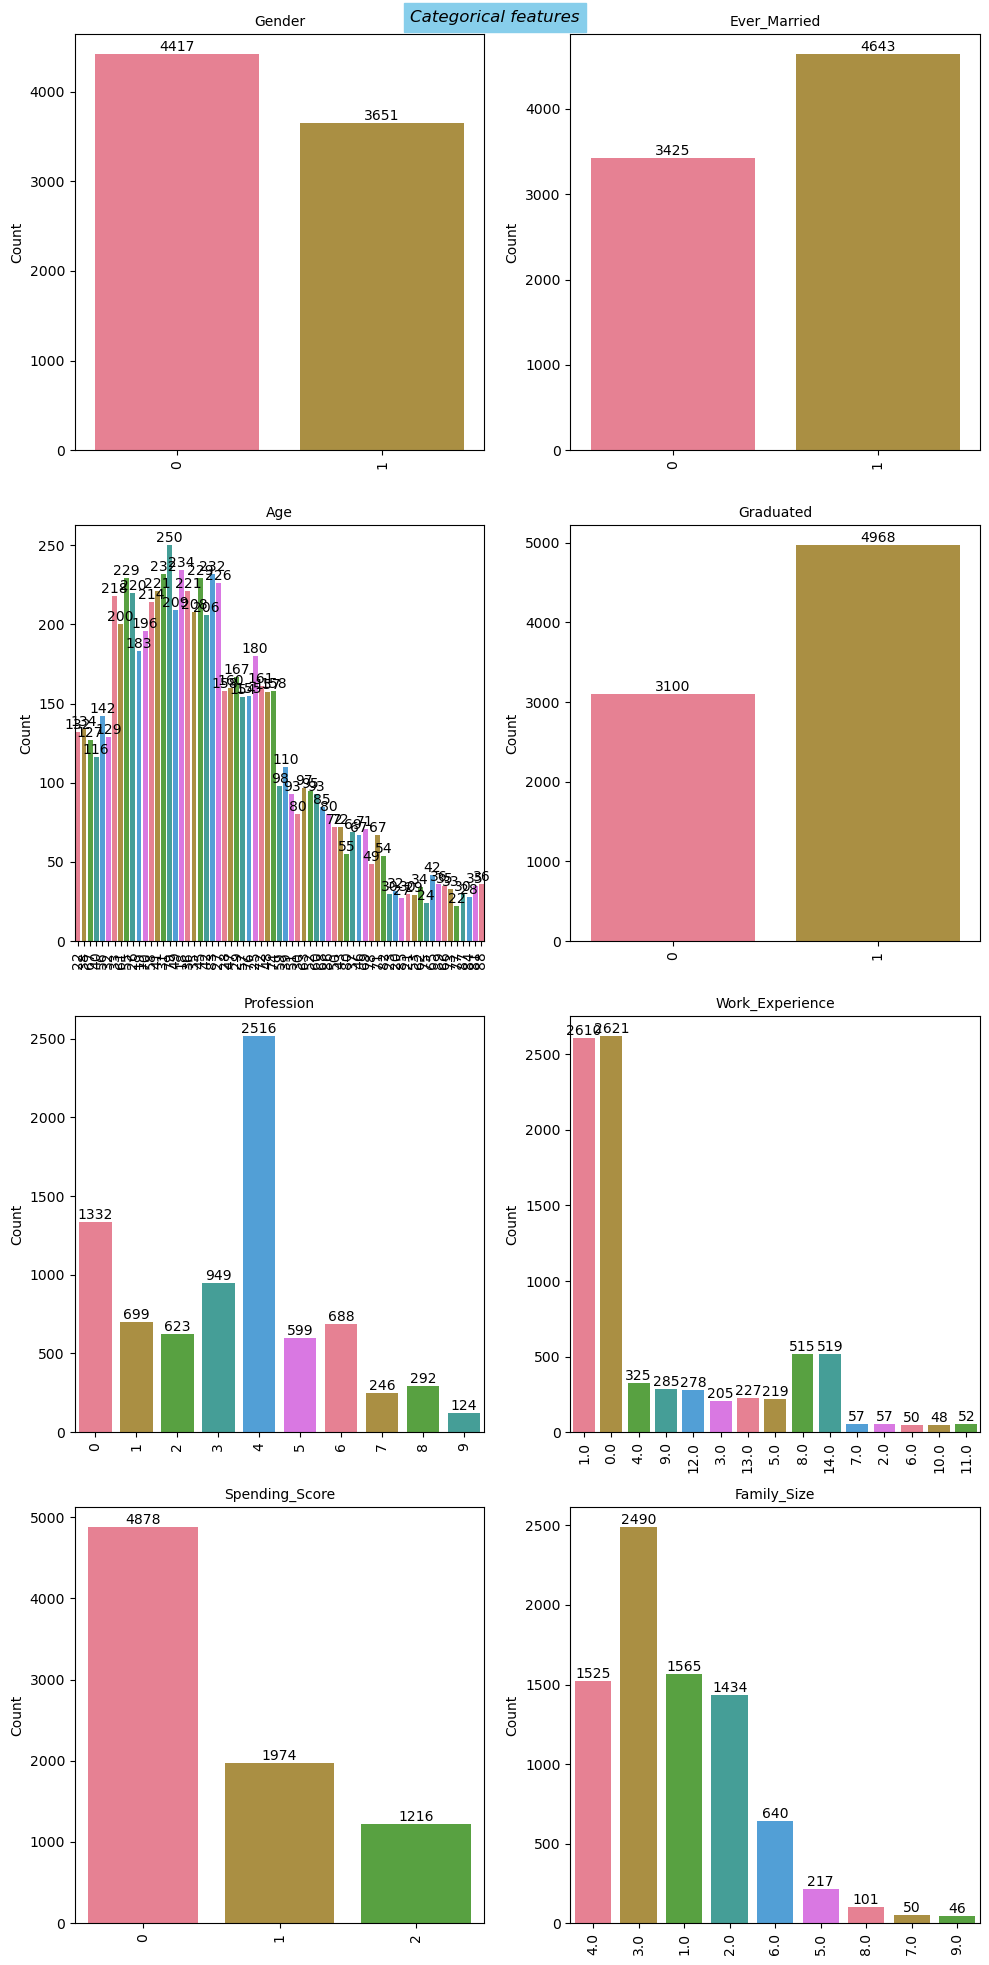

In [33]:
fig = plt.figure(figsize = (10,20))
plt.suptitle('Categorical features',style = 'italic' , backgroundcolor = 'skyblue', font = 'Arial')

for i,j in enumerate(train.columns):
    ax = fig.add_subplot(4,2,i+1)
    ax = sns.countplot(train , x = j, palette = sns.color_palette('husl') )
    ax.set_title(j , fontsize = 15 , style = 'italic', font = 'Arial')
    ax.set_xticklabels(labels = train[j].unique() , rotation = 90)
    ax.set_ylabel('Count')
    ax.set_xlabel('')
    ax.bar_label(ax.containers[0],label_type='edge')
    
plt.tight_layout()

For each group A, B, C, D; I want to understand if Gender, Spending_Score and Family_Size affect to classify all customers into 4 segments

In [34]:
def plot_category(categorical, contenious= train_df.Age, target= train_df['Segmentation']):
    """
    Make Some Visualizations
    :param categorical: categorical feature
    :param contenious: numerical feature that want to show its distribution.
    :param target: target feature to make hue
    :return: None
    """

    sns.set_theme(style='ticks')
    plt.figure(figsize=(10, 5))
    plt.title("Count of each value in " + categorical.name)
    sns.countplot(x=categorical, hue=target); plt.show()

#     sns.set_theme(style='darkgrid')
#     plt.figure(figsize=(10, 5))
#     plt.title("Distribution of " + contenious.name + " based on " + categorical.name)
#     sns.stripplot(x=categorical, y=contenious, hue=target); plt.show()

#     sns.set_theme(style='ticks')
#     plt.figure(figsize=(10, 5))
#     plt.title("Distribution of " + contenious.name + " based on " + categorical.name)
#     sns.boxenplot(x=categorical, y=contenious, hue=target); plt.show()

    pass

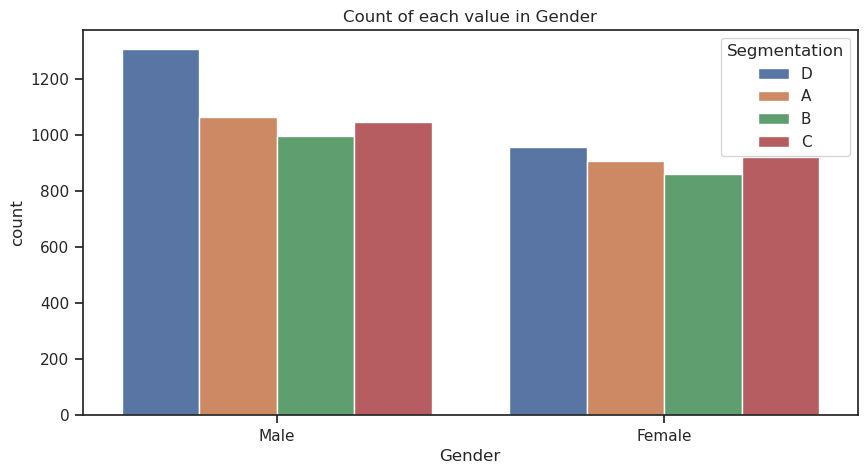

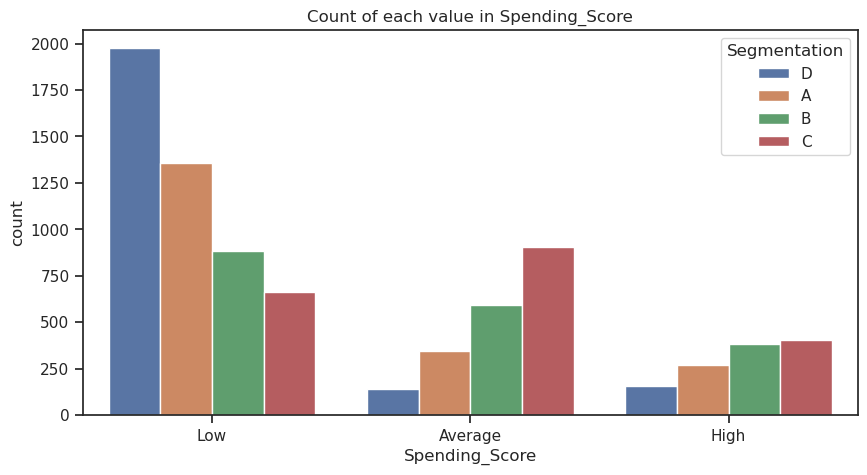

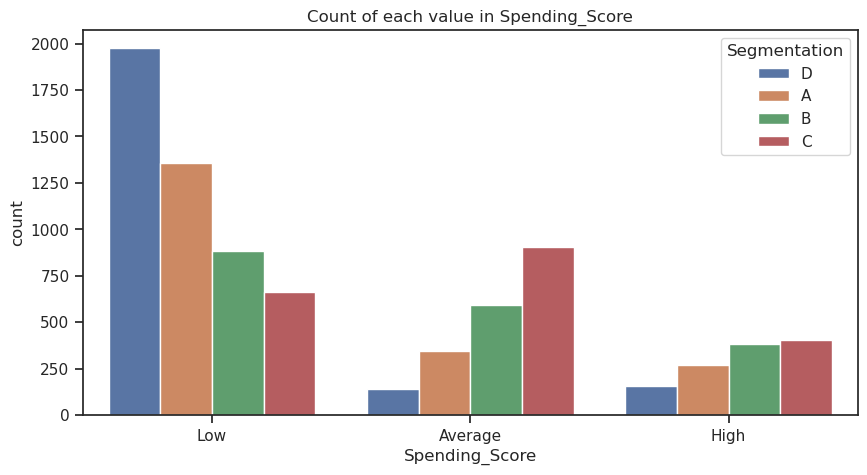

In [35]:
plot_category(categorical=train_df.Gender)
plot_category(categorical=train_df.Spending_Score)
plot_category(categorical=train_df.Spending_Score)

In [36]:
train_df.Gender

0         Male
1       Female
2       Female
3         Male
4       Female
         ...  
8063      Male
8064      Male
8065    Female
8066    Female
8067      Male
Name: Gender, Length: 8068, dtype: object

# Classification

For the task Classification, I will choose 2 types of machine leaning models for the purpose of comparision: suppervised and unsuppervised

In [37]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing

In [42]:
X = np.array(train)
y = np.array(label_train)



In [43]:
scaler = preprocessing.StandardScaler().fit(X)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
X_train

array([[ 1.,  0., 33., ...,  1.,  0.,  5.],
       [ 0.,  0., 53., ...,  0.,  0.,  1.],
       [ 0.,  0., 37., ...,  2.,  0.,  1.],
       ...,
       [ 1.,  0., 41., ...,  9.,  0.,  3.],
       [ 1.,  1., 73., ...,  0.,  1.,  3.],
       [ 0.,  1., 51., ...,  1.,  0.,  2.]])

In [46]:
X_train = scaler.transform(X_train)
X_train

array([[ 1.0999116 , -1.16431114, -0.62636101, ..., -0.4759665 ,
        -0.7368331 ,  1.40877544],
       [-0.90916397, -1.16431114,  0.57047976, ..., -0.77067852,
        -0.7368331 , -1.20695444],
       [-0.90916397, -1.16431114, -0.38699286, ..., -0.18125447,
        -0.7368331 , -1.20695444],
       ...,
       [ 1.0999116 , -1.16431114, -0.1476247 , ...,  1.88172971,
        -0.7368331 ,  0.1009105 ],
       [ 1.0999116 ,  0.85887695,  1.76732054, ..., -0.77067852,
         0.61241099,  0.1009105 ],
       [-0.90916397,  0.85887695,  0.45079569, ..., -0.4759665 ,
        -0.7368331 , -0.55302197]])

In [47]:
X_test = scaler.transform(X_test)

In [48]:
len(X_train)

6454

In [49]:
len(X_test)

1614

## Suppervised

### Gaussian Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

In [51]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [52]:
y_predNB = nb.predict(X_test)

In [53]:
y_predNB

array([3, 0, 3, ..., 3, 0, 2])

**Result**

In [54]:
target_names = ['A', 'B', 'C','D']
print(classification_report(y_test, y_predNB, target_names=target_names))

              precision    recall  f1-score   support

           A       0.60      0.74      0.66       451
           B       0.37      0.27      0.31       384
           C       0.30      0.14      0.19       399
           D       0.43      0.66      0.52       380

    accuracy                           0.46      1614
   macro avg       0.42      0.45      0.42      1614
weighted avg       0.43      0.46      0.43      1614



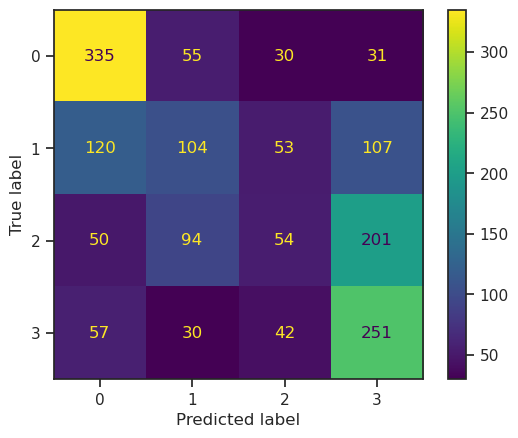

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predNB)
plt.show()

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(max_depth=6, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

In [58]:
y_predRF = rf.predict(X_test)

In [59]:
y_predRF

array([3, 0, 3, ..., 3, 1, 1])

**Result**

In [60]:
target_names = ['A', 'B', 'C','D']
print(classification_report(y_test, y_predRF, target_names=target_names))

              precision    recall  f1-score   support

           A       0.67      0.71      0.69       451
           B       0.40      0.49      0.44       384
           C       0.35      0.21      0.26       399
           D       0.50      0.56      0.53       380

    accuracy                           0.50      1614
   macro avg       0.48      0.49      0.48      1614
weighted avg       0.49      0.50      0.49      1614



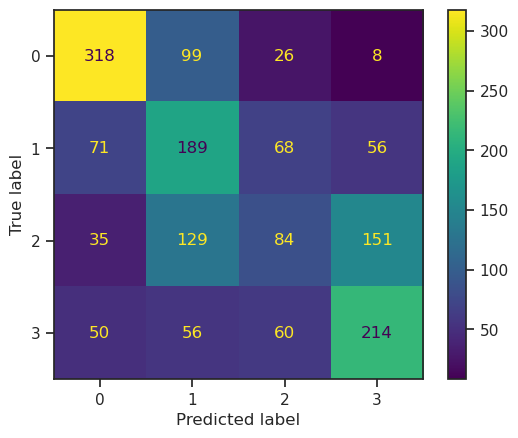

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predRF)
plt.show()

## Unsuppervised

### Kmeans

In [62]:
from sklearn.cluster import KMeans

In [63]:
train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,0,22,0,0,1.0,0,4.0
1,1,1,38,1,1,1.0,1,3.0
2,1,1,67,1,1,1.0,0,1.0
3,0,1,67,1,2,0.0,2,2.0
4,1,1,40,1,3,0.0,2,6.0
...,...,...,...,...,...,...,...,...
8063,0,0,22,0,9,0.0,0,7.0
8064,0,0,35,0,5,3.0,0,4.0
8065,1,0,33,1,0,1.0,0,1.0
8066,1,0,27,1,0,1.0,0,4.0


In [64]:
initial_points_index

[1, 2, 5, 0]

In [65]:
initial_points = []
for i in initial_points_index:
    initial_points.append(list(train.loc[i]))

initial_points

[[1.0, 1.0, 38.0, 1.0, 1.0, 1.0, 1.0, 3.0],
 [1.0, 1.0, 67.0, 1.0, 1.0, 1.0, 0.0, 1.0],
 [0.0, 1.0, 56.0, 0.0, 4.0, 0.0, 1.0, 2.0],
 [0.0, 0.0, 22.0, 0.0, 0.0, 1.0, 0.0, 4.0]]

In [68]:
initial_centers = np.array(initial_points)
initial_centers = scaler.transform(initial_centers)
initial_centers

array([[ 1.0999116 ,  0.85887695, -0.32715082,  0.78993263, -1.04764361,
        -0.4759665 ,  0.61241099,  0.1009105 ],
       [ 1.0999116 ,  0.85887695,  1.40826831,  0.78993263, -1.04764361,
        -0.4759665 , -0.7368331 , -1.20695444],
       [-0.90916397,  0.85887695,  0.75000588, -1.26593074,  0.28100014,
        -0.77067852,  0.61241099, -0.55302197],
       [-0.90916397, -1.16431114, -1.28462344, -1.26593074, -1.49052485,
        -0.4759665 , -0.7368331 ,  0.75484297]])

In [69]:
kmeans = KMeans(n_clusters=4, random_state=2, n_init=1,max_iter = 700, init=initial_centers).fit(X_train)

In [70]:
kmeans.labels_

array([3, 1, 1, ..., 1, 0, 2], dtype=int32)

In [71]:
centroids = kmeans.cluster_centers_
print("Centroids:", centroids)

Centroids: [[ 1.0999116   0.82832778  0.52464331  0.25656519  0.07247815 -0.07627469
   0.54944009 -0.13337416]
 [ 0.28982132 -1.13048292 -0.40746615  0.20953133  0.50457684  0.31056399
  -0.72034716 -0.49835237]
 [-0.90916397  0.83044593  0.48703728  0.14596092  0.24365838 -0.11365507
   0.4962023  -0.05916363]
 [-0.03791437 -1.08737762 -1.0264215  -0.84843745 -1.10604947 -0.12450572
  -0.69207663  0.87282593]]


In [72]:
y_predKM = kmeans.predict(X_test)

In [73]:
y_predKM

array([2, 1, 2, ..., 0, 1, 0], dtype=int32)

In [74]:
initial_centers[0]

array([ 1.0999116 ,  0.85887695, -0.32715082,  0.78993263, -1.04764361,
       -0.4759665 ,  0.61241099,  0.1009105 ])

In [75]:
temp = kmeans.predict([initial_centers[1]])
temp

array([0], dtype=int32)

**Result**

In [76]:
target_names = ['A', 'B', 'C','D']
print(classification_report(y_test, y_predKM, target_names=target_names))

              precision    recall  f1-score   support

           A       0.11      0.09      0.10       451
           B       0.36      0.34      0.35       384
           C       0.31      0.44      0.36       399
           D       0.13      0.11      0.12       380

    accuracy                           0.24      1614
   macro avg       0.23      0.24      0.23      1614
weighted avg       0.22      0.24      0.23      1614



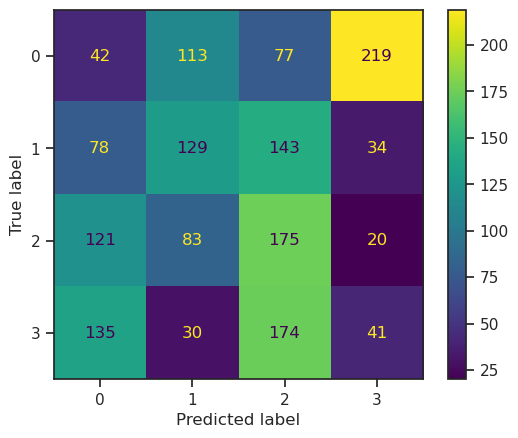

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predKM)
plt.show()

### PCA + Kmeans

In [78]:
from sklearn.decomposition import PCA

In [86]:
pca = PCA(n_components=2)

In [87]:
pca.fit(X_train)

PCA(n_components=2)

In [94]:
initial_centers

array([[ 1.0999116 ,  0.85887695, -0.32715082,  0.78993263, -1.04764361,
        -0.4759665 ,  0.61241099,  0.1009105 ],
       [ 1.0999116 ,  0.85887695,  1.40826831,  0.78993263, -1.04764361,
        -0.4759665 , -0.7368331 , -1.20695444],
       [-0.90916397,  0.85887695,  0.75000588, -1.26593074,  0.28100014,
        -0.77067852,  0.61241099, -0.55302197],
       [-0.90916397, -1.16431114, -1.28462344, -1.26593074, -1.49052485,
        -0.4759665 , -0.7368331 ,  0.75484297]])

In [95]:
initial_centers_pca = pca.transform(initial_centers)
initial_centers_pca

array([[ 0.54890528,  0.07871399],
       [ 1.06110462, -1.25806596],
       [ 1.13850373,  1.02788286],
       [-2.3773726 ,  1.46294121]])

In [96]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [97]:
X_train

array([[ 1.0999116 , -1.16431114, -0.62636101, ..., -0.4759665 ,
        -0.7368331 ,  1.40877544],
       [-0.90916397, -1.16431114,  0.57047976, ..., -0.77067852,
        -0.7368331 , -1.20695444],
       [-0.90916397, -1.16431114, -0.38699286, ..., -0.18125447,
        -0.7368331 , -1.20695444],
       ...,
       [ 1.0999116 , -1.16431114, -0.1476247 , ...,  1.88172971,
        -0.7368331 ,  0.1009105 ],
       [ 1.0999116 ,  0.85887695,  1.76732054, ..., -0.77067852,
         0.61241099,  0.1009105 ],
       [-0.90916397,  0.85887695,  0.45079569, ..., -0.4759665 ,
        -0.7368331 , -0.55302197]])

In [98]:
X_train_pca

array([[-1.71222899,  0.2346884 ],
       [-0.02572989, -1.05826393],
       [-0.19167625, -1.59990167],
       ...,
       [-1.27087568, -1.24829207],
       [ 1.99330177, -0.21611316],
       [ 0.9006517 , -0.39438109]])

In [99]:
kmeans_pca = KMeans(n_clusters=4, random_state=2, n_init=1,max_iter = 700, init=initial_centers_pca).fit(X_train_pca)

In [100]:
kmeans_pca.labels_

array([3, 1, 1, ..., 1, 0, 0], dtype=int32)

In [101]:
centroids = kmeans_pca.cluster_centers_
print("Centroids:", centroids)

Centroids: [[ 1.18663123 -0.47866732]
 [-0.85853425 -1.22375445]
 [ 1.19417366  1.08318394]
 [-2.02010893  0.84266532]]


In [103]:
y_pred_PCA_KM = kmeans_pca.predict(X_test_pca)
y_pred_PCA_KM

array([2, 3, 2, ..., 0, 1, 0], dtype=int32)

**Result**

In [104]:
target_names = ['A', 'B', 'C','D']
print(classification_report(y_test, y_pred_PCA_KM, target_names=target_names))

              precision    recall  f1-score   support

           A       0.11      0.12      0.11       451
           B       0.38      0.37      0.37       384
           C       0.33      0.36      0.34       399
           D       0.12      0.11      0.12       380

    accuracy                           0.23      1614
   macro avg       0.24      0.24      0.24      1614
weighted avg       0.23      0.23      0.23      1614



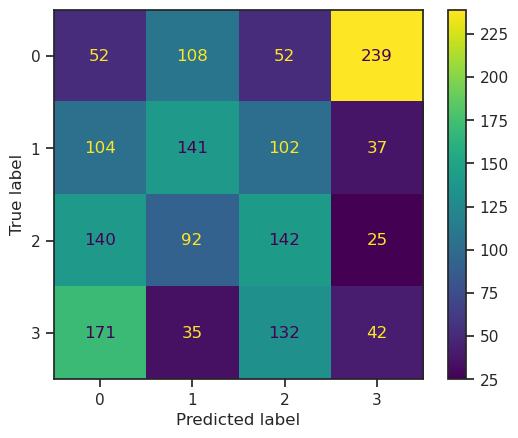

In [105]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_PCA_KM)
plt.show()

# Overal result

PCA + Kmeans:		0.23

Kmeans:			0.24

Random Forest:		0.50

Gaussian Naive Bayes:	0.46

RF will return the best result for classification task. Because there are only 8 features so when I use PCA to reduce from 8 -> 2 it cause bad result .For any improvement I will try it in future